In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import Planck, Boltzmann, gas_constant
from sympy import *

In [2]:
print(f"{Planck = }")
print(f"{Boltzmann = }")
print(f"{gas_constant = }")

Planck = 6.62607015e-34
Boltzmann = 1.380649e-23
gas_constant = 8.314462618


# *Macromolecular rate* theory

Many reactions in biological systems - or more specifically, their rates - depend on a rate coefficient that is itself a function of temperature. Arrhenius was one of the first to generalise this into a law that can be written down as

$$
k(T) = \frac{k_B T}{h}e^{-\frac{\Delta G^{\ddagger}}{R T}}.
$$

Here, $\Delta G^{\ddagger}$ is the free energy of activation that is related to the enthalpy $\Delta H^{\ddagger}$ and the entropy $\Delta S^{\ddagger}$ via

$$
\Delta G^{\ddagger} = \Delta H^{\ddagger} -  T\Delta S^{\ddagger}
$$

From thermodynamics we know that the entropy part can be expressed by means of the amount of heat added to the system

$$
\Delta S^{\ddagger} = \Delta C_p^{\ddagger} \log(T/T_0) + \Delta S_0^{\ddagger}.
$$

In a similar way, we can express the enthalpy

$$
\Delta H^{\ddagger} = \Delta C_p^{\ddagger} (T - T_0) + \Delta H_0^{\ddagger}.
$$

Substituting the last two expressions with the first we get the MMRT-$k(T)$ function:

$$
k(T) = \frac{k_B T}{h}e^{-\frac{\Delta C_p^{\ddagger} (T - T_0) + \Delta H_0^{\ddagger}}{R T} + \frac{\Delta C_p^{\ddagger} \log(T/T_0) + \Delta S_0^{\ddagger}}{R}}
$$

That equation yields four free parameters, $\Delta C_p^{\ddagger}$, $\Delta H_0^{\ddagger}$,  $\Delta S_0^{\ddagger}$, and $T_0$. They define the reaction rate of a specific system. The *macromolecular rate theory* is a thought of as a general law, so a wide range of biological and biochemical cases have been identified where this equations holds.

From the rate reaction equation we can derive some useful properties. For example, we can derive the optimal temperature for the rate as $T_{\text{opt}} = \frac{\Delta C_p^{\ddagger}T_0 - \Delta H_0^{\ddagger}}{\Delta C_p^{\ddagger}+R}$: reaction rates decrease for temperatures that are larger than the optimal temperature.

T_opt = 293.1


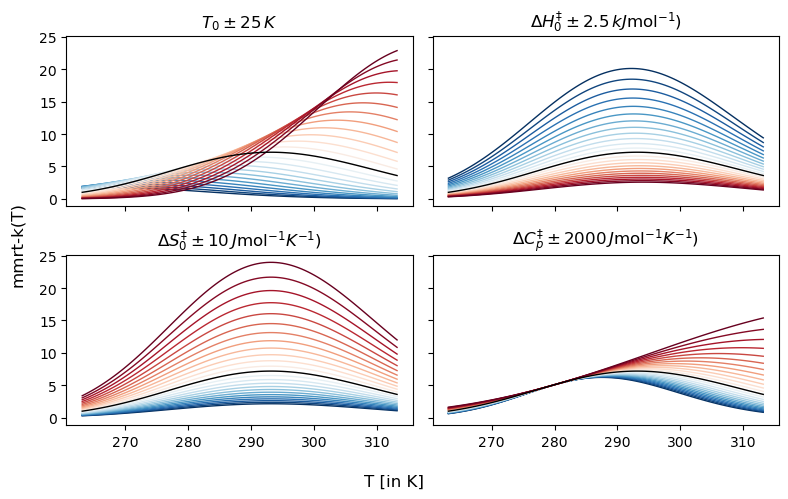

In [3]:
def mmrt(T, kappa, dH0, dS0, T0, dCp):
    return (Boltzmann * T * kappa / Planck *
            np.exp(-(dH0 + dCp * (T - T0)) / (gas_constant * T) +
                   (dS0 + dCp * np.log(T/T0)) / gas_constant))


# Temperature range (from -2°C to 35°C)
T = np.linspace(-10, 40, 100) + 273.15

# Parameter values from Table 1 of
# https://www.cell.com/biophysj/fulltext/S0006-3495(22)03962-5
kappa  = 1       # s^-1 (scaled down); let's stick to 1 for now
dH0    = 33000   # J/mol (adjusted)
dS0    = -113    # J/(mol·K) (adjusted)
T0     = 280     # K
dCp    = -2700   # J/(mol·K)


T_opt = (dCp*T0-dH0)/(dCp+gas_constant)
print(f"{T_opt = :.1f}")

fig, ax = plt.subplots(2,2,figsize=(8,5),sharex=True,sharey=True)

n = 25
# colors = mpl.cm.BlRu(np.linspace(0,1,n))
colors = plt.get_cmap('RdBu_r')

delta_T0 = 25
for i,T0_ in enumerate(np.linspace(T0-delta_T0,T0+delta_T0,n)):
    k = mmrt(T, kappa, dH0, dS0, T0_, dCp)
    ax[0,0].plot(T,k,'-',color=colors(i/(n-1)), lw=1)
k = mmrt(T, kappa, dH0, dS0, T0, dCp)
ax[0,0].plot(T,k,'k-',lw=1)
ax[0,0].set_title(r"$T_0 \pm 25\,K$")

delta_dH0 = 2500
for i,dH0_ in enumerate(np.linspace(dH0-delta_dH0,dH0+delta_dH0,n)):
    k = mmrt(T, kappa, dH0_, dS0, T0, dCp)
    ax[0,1].plot(T,k,'-',color=colors(i/(n-1)), lw=1)
k = mmrt(T, kappa, dH0, dS0, T0, dCp)
ax[0,1].plot(T,k,'k-',lw=1)
ax[0,1].set_title(r"$\Delta H_0^{\ddagger} \pm 2.5\,kJ\text{\mol}^{-1})$")

delta_dS0 = 10
for i,dS0_ in enumerate(np.linspace(dS0-delta_dS0,dS0+delta_dS0,n)):
    k = mmrt(T, kappa, dH0, dS0_, T0, dCp)
    ax[1,0].plot(T,k,'-',color=colors(i/(n-1)), lw=1)
k = mmrt(T, kappa, dH0, dS0, T0, dCp)
ax[1,0].plot(T,k,'k-',lw=1)
ax[1,0].set_title(r"$\Delta S_0^{\ddagger} \pm 10\,J\text{\mol}^{-1}K^{-1})$")

delta_dCp = 2000
for i,dCp_ in enumerate(np.linspace(dCp-delta_dCp,dCp+delta_dCp,n)):
    k = mmrt(T, kappa, dH0, dS0, T0, dCp_)
    ax[1,1].plot(T,k,'-',color=colors(i/(n-1)), lw=1)
k = mmrt(T, kappa, dH0, dS0, T0, dCp)
ax[1,1].plot(T,k,'k-',lw=1)
ax[1,1].set_title(r"$\Delta C_p^{\ddagger} \pm 2000\,J\text{\mol}^{-1}K^{-1})$")

# ax[0,0].set_yscale("log")

fig.supylabel("mmrt-k(T)")
fig.supxlabel("T [in K]")

fig.tight_layout()

Let's vary those four parameters randomly, all at once.

(3.475022378722383e-08, 429.3070244421573)

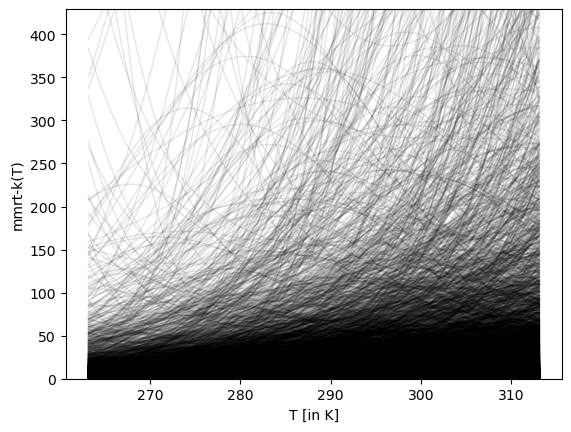

In [4]:
rng = np.random.default_rng(1234)

fig, ax = plt.subplots(1,1)

n = 10_000
k_min = []
k_max = []
for i in range(n):
    dH0_ = rng.normal(dH0,delta_dH0)
    dS0_ = rng.normal(dS0,delta_dS0)
    T0_  = rng.normal(T0,delta_T0)
    dCp_ = rng.normal(dCp,delta_dCp)
    k = mmrt(T, kappa, dH0_, dS0_, T0_, dCp_)
    k_min.append(min(k))
    k_max.append(max(k))
    ax.plot(T,k,'k-',lw=1, alpha=0.1)
# ax.set_yscale("log")
ax.set_xlabel("T [in K]")
ax.set_ylabel("mmrt-k(T)")

ax.set_ylim(np.percentile(k_min,2.5),np.percentile(k_max,97.5))

Now, let's compare it to the logistic curve, for which we also vary the parameters randomly.

(0.00026786940357726607, 534.0028798931204)

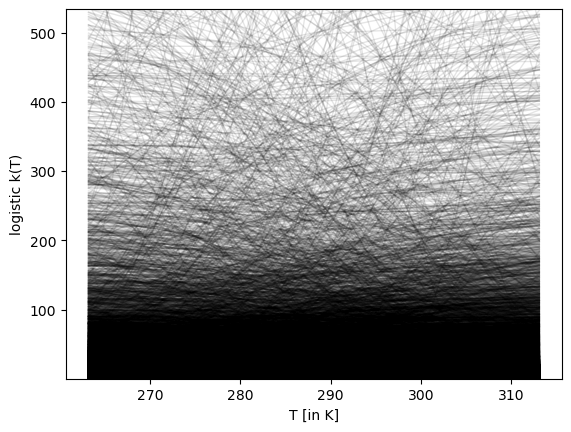

In [5]:
rng = np.random.default_rng(1234)

fig, ax = plt.subplots(1,1)

n = 10_000
k_min = []
k_max = []
for i in range(n):
    L = rng.lognormal(3.5,1.5)
    k = rng.normal(0,0.15)
    T0 = rng.normal(288,15)
    logistic = L/(1+np.exp(-k*(T-T0)))
    k_min.append(min(logistic))
    k_max.append(max(logistic))
    ax.plot(T,logistic,'k-',lw=1, alpha=0.1)
# ax.set_yscale("log")
ax.set_xlabel("T [in K]")
ax.set_ylabel("logistic k(T)")

ax.set_ylim(np.percentile(k_min,2.5),np.percentile(k_max,97.5))

In [6]:
# define symbols for symolic calculations
dH0_sym, dS0_sym, dCp_sym, T0_sym, k_sym, T_sym =  symbols("dH_0 dS_0 dCp T_0 k T")
R_sym, h_sym, kB_sym =  symbols("R h k_B")

k_sym = kB_sym*T_sym/h_sym * exp(
    -(dH0_sym + dCp_sym*(T_sym-T0_sym))/(R_sym*T_sym)
    +(dS0_sym + dCp_sym*log(T_sym/T0_sym))/R_sym)
k_sym

T*k_B*exp((dCp*log(T/T_0) + dS_0)/R + (-dCp*(T - T_0) - dH_0)/(R*T))/h

In [7]:
# solveset(diff(k_sym,T_sym),T_sym)

-k_B*exp(-(-T*(dCp*log(T/T_0) + dS_0) + dCp*(T - T_0) + dH_0)/(R*T))/(R*h)

T*k_B*exp((T*(dCp*log(T/T_0) + dS_0) - dCp*(T - T_0) - dH_0)/(R*T))/(R*h)

k_B*(T*log(T/T_0) - T + T_0)*exp((T*(dCp*log(T/T_0) + dS_0) - dCp*(T - T_0) - dH_0)/(R*T))/(R*h)

-dCp*k_B*(T - T_0)*exp(-(-T*(dCp*log(T/T_0) + dS_0) + dCp*(T - T_0) + dH_0)/(R*T))/(R*T_0*h)

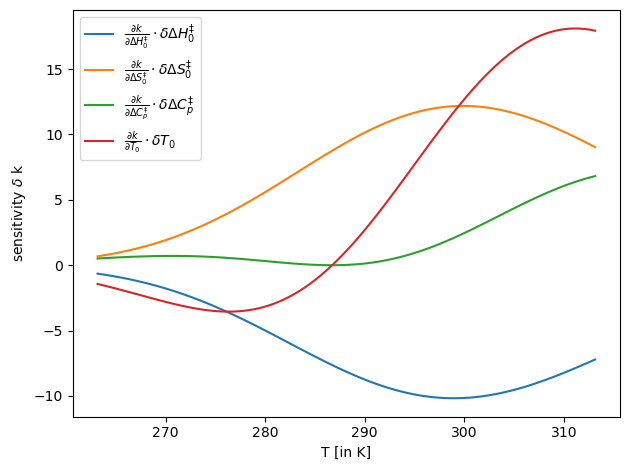

In [8]:
fig, ax = plt.subplots(1,1)#,figsize=(8,5))
# ax = [
labels = [
    r"$\frac{\partial k}{\partial \Delta H_0^{\ddagger}} \cdot \delta \Delta H_0^{\ddagger}$",
    r"$\frac{\partial k}{\partial \Delta S_0^{\ddagger}} \cdot \delta \Delta S_0^{\ddagger}$",
    r"$\frac{\partial k}{\partial \Delta C_p^{\ddagger}} \cdot \delta \Delta C_p^{\ddagger}$",
    r"$\frac{\partial k}{\partial T_0} \cdot \delta T_0$"
]
deltas = [delta_dH0,delta_dS0,delta_dCp,delta_T0]
for i,x_sym in enumerate([dH0_sym, dS0_sym, dCp_sym, T0_sym]):
    this_diff = diff(k_sym,x_sym).simplify()
    display(this_diff)
    lam_f = lambdify((T_sym, dH0_sym, dS0_sym, T0_sym, dCp_sym),
                     this_diff.subs(
                         [(R_sym, gas_constant),(h_sym, Planck), (kB_sym, Boltzmann)]
                     ))
    ax.plot(T,deltas[i]*lam_f(T, dH0, dS0, T0, dCp),label=labels[i])
#     ax[i].set_ylabel(labels[i])
ax.set_xlabel("T [in K]")
ax.set_ylabel("sensitivity " + r"$\delta$" + " k")
ax.legend()

fig.tight_layout()